In [3]:
import sunpy 
import astropy.units as u

from sunpy.net import Fido, attrs as a 
import astropy.time


from astropy.io import fits as astro_fits  
from astropy.io.fits import getdata

import copy
import glob

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable 
import matplotlib as mpl 
from matplotlib.collections import LineCollection


import numpy as np
from IPython.display import HTML

import astropy.table
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.visualization import AsymmetricPercentileInterval, ImageNormalize, LogStretch 

#These packages are for Using TrackPy
import matplotlib.pyplot as plt 
import pandas as pd
from pandas import DataFrame, Series  # for convenience
import pims
import trackpy as tp 
from numpy import sqrt  

In [4]:
Sun_Start = "2022-08-01T00:00" #Start Time 
Sun_End = "2022-08-01T00:01" #End time 

Sun_Time = a.Time(Sun_Start , Sun_End) 

In [5]:
 Data = Fido.search(Sun_Time & a.Instrument.aia & a.Wavelength(94*u.angstrom)) #Gets Data

In [7]:
files = Fido.fetch(Data)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

aia20220801_000000_0094.fits:   0%|          | 0.00/720k [00:00<?, ?B/s]

In [8]:
files

['C:\\Users\\14242\\sunpy\\data\\aia20220801_000000_0094.fits']

In [9]:
Fido.fetch(files)#fetch files on computer

Files Downloaded: 0file [00:00, ?file/s]

['C:\\Users\\14242\\sunpy\\data\\aia20220801_000000_0094.fits']

In [10]:
List_2 = glob.glob(r'C:\Users\14242\2022 Summer Internship\Aug Solor flare Pic\*')

In [11]:
data_average = [] #Averages subtracted data
data_median = [] #Median subtracted data
for Polar in List_2: 
    Polardata = getdata(Polar) 
    data_average.append(Polardata - np.average(Polardata)) 
    data_median.append(Polardata - np.median(Polardata))  
    
Arr=np.array(data_average)#Converts Arr list into numpy array

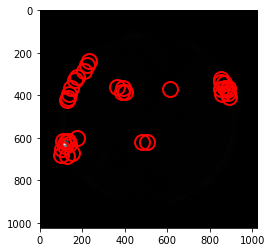

In [12]:
#Use trackpy to locate Gaussian-like blobs of some image
f = tp.locate(Arr[0], 11, invert = True, minmass = 70) 

tp.annotate(f,Arr[0]);#Creates the graph of f 

In [13]:
r = tp.batch(Arr,11, minmass =50); 

Frame 0: 96 features


In [14]:
t = tp.link(r,5,memory = 9)

In [15]:
t1 = tp.filter_stubs(t,5) #Filters out Spurious traj 
print('Before:', t['particle'].nunique())
print('After:', t1['particle'].nunique())

Before: 96
After: 0


In [ ]:
t2 = t1[((t1['mass'] <400 ) & (t1['size'] > 2.2) &
         (t1['ecc'] < 1))]

In [ ]:
R = 1625.691406

In [ ]:
iloc_valid = []

for i in range(len(t)): #I changed f into t 
    r = np.sqrt((t2['x'].iloc[i]- 2070.828369)**2 + (t2['y'].iloc[i] - 2008.760620)**2)
    if r<R: 
        print (r, t2['particle'].iloc[i])
        iloc_valid.append(i)

In [ ]:
Tot_part = len(t2.iloc[iloc_valid].particle.unique())#Total # of particles        
Position = range(1,Tot_part+1) 
fig = plt.figure(1,figsize = (10,45)) 

i = 0
for p in range(Tot_part): ##Repeats the action below 
       
    if not (t2.loc[t2.particle==p].empty): 
        ax = fig.add_subplot(Tot_part, 1,Position[i])##Defining Plots axis bounds 
        ax.set_xlim((0,9))##Sets Frame bounds 
        t2.loc[t2.particle==p].plot(x='frame',y='signal', 
                               style = '-o',label =f'part {p}',ax=ax) 
        i += 1
plt.show()

In [ ]:
Bull=[]
for i in range(10): 
    s= t2.iloc[iloc_valid].loc[i].sum(axis=0).loc['signal']  
    Bull+=[s]

In [ ]:
x = np.linspace(0, 9, num=10)
y = np.array(Bull)

plt.title('Light Curve')
plt.plot(x, y, color="red")

plt.show()